In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Merging 12 months of sales data into a single file

In [3]:
files = [file for file in os.listdir('./sales-data')]

combined_data = pd.DataFrame()

for file in files: 
    df = pd.read_csv("./sales-data/" + file) 
    combined_data = pd.concat([combined_data, df])

combined_data.to_csv("combined-data.csv", index = False, mode='w+')

combined_data = pd.read_csv("combined-data.csv")

In [4]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning



#### Drop NaN rows

In [5]:
nan_df = combined_data[combined_data.isna().any(axis=1)]
nan_df.head()

combined_data = combined_data.dropna(how='all')
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
nan_df = combined_data[combined_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Verify the merge. Check there is data from every month.

In [7]:
# Selects the first entry that matches condition where order date starts
# with 01-09 and returns true is there is a record for that month
for i in range(1, 10):
    num = '0'+ str(i)
    temp = combined_data[combined_data['Order Date'].str.startswith(num)].head(1)
    if temp is not None:
        print(num, True)
        
# Condition: where order date has months = 10-12
for i in range(10, 13):
    num = str(i)
    temp = combined_data[combined_data['Order Date'].str.startswith(num)].head(1)
    if temp is not None:
        print(num, True)

01 True
02 True
03 True
04 True
05 True
06 True
07 True
08 True
09 True
10 True
11 True
12 True


#### Duplicated column headers

In [8]:
temp_df = combined_data[combined_data['Order Date'].str[0:5] == 'Order']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
combined_data = combined_data[combined_data['Order Date'].str[0:5] != 'Order']

temp_df = combined_data[combined_data['Order Date'].str[0:5] == 'Order']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Add a Month Column

In [10]:
combined_data['Month'] = combined_data['Order Date'].str[0:2]
combined_data['Month'] = combined_data['Month'].astype('int')
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Convert column data types

In [11]:
# Convert 'Quantity Ordered' to int
combined_data['Quantity Ordered'] = pd.to_numeric(combined_data['Quantity Ordered'])

# Convert 'Price Each' to float
combined_data['Price Each'] = pd.to_numeric(combined_data['Price Each'])

#### Add a Total Price Column

In [12]:
combined_data['Total Price'] = combined_data['Quantity Ordered'] * combined_data['Price Each']
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a City Column

In [13]:
# pd.df.apply() allows you to use functions on a column, eg:
# def get_city(address):
#     return address.split(',')[1]
# combined_data['City'] = combined_data['Purchase Address'].apply(lambda x: get_city(x))

combined_data['City'] = combined_data['Purchase Address'].apply(lambda x: x.split(',')[1]) +', '+ combined_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1]) 
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


#### Convert column data types

In [14]:
# Convert 'Order Date' to datetime
combined_data['Order Date'] = pd.to_datetime(combined_data['Order Date'])

#### Add Hour and Minute Columns

In [15]:
combined_data['Hour'] = combined_data["Order Date"].dt.hour
combined_data['Minute'] = combined_data["Order Date"].dt.minute
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


### Analysis Questions

#### Question 1: What was the best month of sales? How much was earned that month?

In [16]:
results = combined_data.groupby('Month').sum()
#results = combined_data.groupby('Month').sum()['Total Price']
print(results)

       Quantity Ordered  Price Each  Total Price    Hour  Minute
Month                                                           
1                 10903  1811768.38   1822256.73  139485  282440
2                 13449  2188884.72   2202022.42  172669  354885
3                 17005  2791207.83   2807100.38  218969  447559
4                 20558  3367671.02   3390670.24  262259  544186
5                 18667  3135125.13   3152606.75  238780  487899
6                 15253  2562025.61   2577802.26  195528  402436
7                 16072  2632539.56   2647775.76  206169  417349
8                 13448  2230345.42   2244467.88  172289  353857
9                 13109  2084992.09   2097560.13  168513  341698
10                22703  3715554.83   3736726.88  290650  598437
11                19798  3180600.68   3199603.20  254865  518231
12                28114  4588415.41   4613443.34  359978  733082


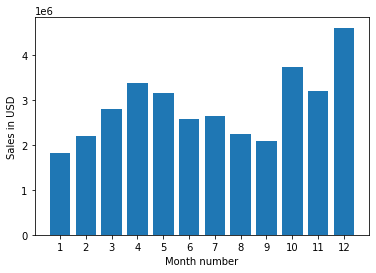

In [17]:
months = range(1, 13)
plt.bar(months, results['Total Price'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

# December was the best month for sales. ($4,613,443.34)

#### Question 2: What city had the highest number of sales?

In [18]:
results = combined_data.groupby('City').sum()
results.head()

,Quantity Ordered,Price Each,Month,Total Price,Hour,Minute
City,,,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58,214264,442932
"Austin, TX",11153,1809873.61,69829,1819581.75,141946,289060
"Boston, MA",22528,3637409.77,141112,3661642.01,288225,590442
"Dallas, TX",16730,2752627.82,104620,2767975.40,214390,435155
"Los Angeles, CA",33289,5421435.23,208325,5452570.80,427444,866638


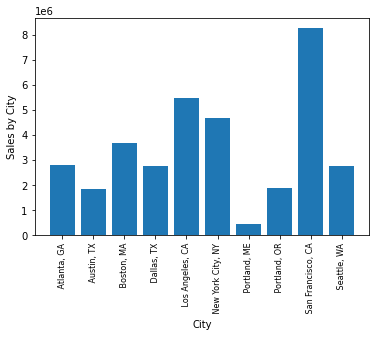

In [19]:
# cities = combined_data['City'].unique() doesn't give correct order
# to get the same order as the groupby done for the sum
cities = [city for city, df in combined_data.groupby('City')]

plt.bar(cities, results['Total Price'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales by City')
plt.xlabel('City')
plt.show()

#### Question 3: What time should we display advertisements to maximise likelihood of customer's buying product?

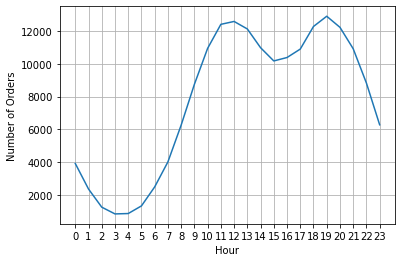

In [20]:
hours = [hour for hour, df in combined_data.groupby('Hour')]
results = combined_data.groupby('Hour')['Hour'].count()

plt.plot(hours, results)
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

# Any time before 1100 and before 1700 as sales peak at those hours

#### Question 4: What products are most often sold together?

In [21]:
# Aggregates products in product column within each OrderID group
temp_df = combined_data.groupby('Order ID')['Product'].agg(', '.join).reset_index()
# Renames Product to Products in new df
temp_df.rename(columns={'Product': 'Products'}, inplace=True)

# Verify the new df has Orders with pairs of products
res = temp_df[temp_df['Products'].str.contains(',', na=False)]
res.head()

,Order ID,Products
41,141275,"USB-C Charging Cable, Wired Headphones"
56,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
131,141365,"Vareebadd Phone, Wired Headphones"
150,141384,"Google Phone, USB-C Charging Cable"
216,141450,"Google Phone, Bose SoundSport Headphones"


In [22]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# Takes a list of list, and outputs the count of each unique product pair
count = Counter()

for row in temp_df['Products']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

for prod, i in count.most_common(10):
    print(f"Count: {i}, Products: {prod[0]}, {prod[1]}")
    
# The iPhone and Lightning Charging Cable are most of sold together (1005)

Count: 1005, Products: iPhone, Lightning Charging Cable
Count: 987, Products: Google Phone, USB-C Charging Cable
Count: 447, Products: iPhone, Wired Headphones
Count: 414, Products: Google Phone, Wired Headphones
Count: 361, Products: Vareebadd Phone, USB-C Charging Cable
Count: 360, Products: iPhone, Apple Airpods Headphones
Count: 220, Products: Google Phone, Bose SoundSport Headphones
Count: 160, Products: USB-C Charging Cable, Wired Headphones
Count: 143, Products: Vareebadd Phone, Wired Headphones
Count: 92, Products: Lightning Charging Cable, Wired Headphones


#### Question 5: What product sold the most? Why do you think it sold the most?

In [23]:
results = combined_data.groupby('Product', as_index=False)['Quantity Ordered']
results = results.sum()
results.head(10)

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


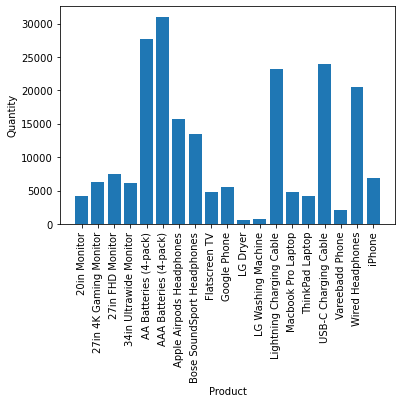

In [24]:
prod = results['Product'].tolist()
quantity = results['Quantity Ordered'].tolist()

plt.bar(prod, quantity)
plt.xticks(prod, rotation='vertical')
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.show()

# AAA Batteries (4 pack) sold the most. Probably due to low cost.

##### Add the Mean price for each product sold

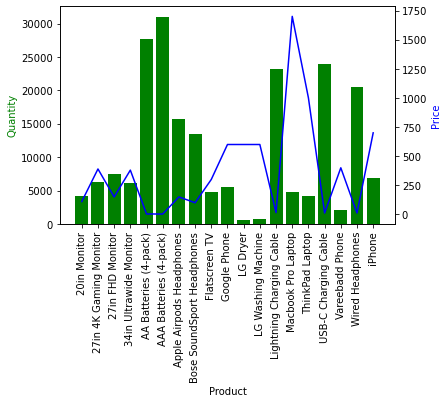

In [25]:
prices = combined_data.groupby('Product').mean()['Price Each']
prices = prices.reset_index()

price = prices['Price Each'].tolist()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prod, quantity, color='g')
ax2.plot(prod, price, 'b-')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticks(range(len(prod)))
ax1.set_xticklabels(prod, rotation='vertical')
plt.show()

# Shows a correlation between the low cost price and highest quantity sold